# Simultaneous Imitation

## Abstract

TODO


## Imitation Task
This is the video, subjects saw the video and imitated movements **simultaneously**.
<iframe width="560" height="315" src="https://www.youtube.com/embed/2hhV0Ev2PDQ"></iframe>


## Subject heatmap and Grand Average

We calculate the grand average data heatmap for fixation, seems like data ranges are [0, 50] and [0, 30] for 
(x, y) respectively so we need to filter data as the next scatter plot shows.


97.99146588509116% of data inside this range


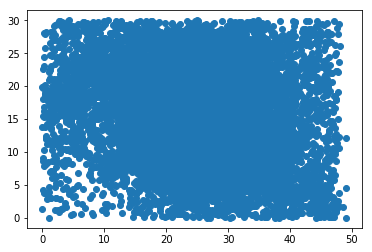

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./source_data/data.csv')

x0 = data['x_start']  # index = 2
y0 = data['y_start']  # index = 3

mask = [(x > 0) and (x < 50) and (y > 0) and (y < 30) for x, y in zip(x0, y0)]
print("{}% of data inside this range".format(100*sum(mask)/len(mask)))
plt.scatter(x0[mask], y0[mask])
plt.show()

%magic


Taking this in mind we create the heatmap:


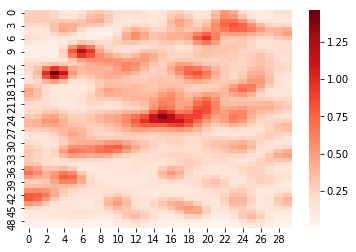

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import cv2


# import data
data = pd.read_csv('./source_data/data.csv')
x0 = data['x_start']  # index = 2
y0 = data['y_start']  # index = 3
duration = data['duration']  # index = 7
mask = [(x > 0) and (x < 50) and (y > 0) and (y < 30) for x, y in zip(x0, y0)]

# translate to a heatmap
heatmap = np.zeros((50, 30))
for x, y, t, valid in zip(x0, y0, duration, mask):
    if valid:
        heatmap[int(x), int(y)] = t

# gaussian filter heatmap
blurred_heatmap = cv2.GaussianBlur(heatmap, (5, 5), 0)

sb.heatmap(blurred_heatmap, cmap='Reds')
plt.show()



## Fixation/Saccade/SmoothPursuit Characterization Overview

We calculate mean fixation duration and number as grand-average.


Grand average fix-time 0.3400095825985397[s]
Grand average sacc-time 0.06574199217906337[s]
Grand average smooth-time 0.9956280560552708[s]


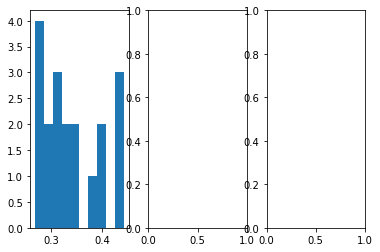

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# create a function that averages duration per subject
def group_average_duration(dataframe, event_id):
    times = dataframe['duration']
    subject_mask = dataframe['subject']
    type_mask = dataframe['type'] 
    n_subjects = subject_mask.max()
    mean_data = np.empty(n_subjects)
    
    for n in range(n_subjects):
        subject_data = [time for index, time in enumerate(times) 
                        if subject_mask[index] == n+1 and type_mask[index] == event_id]
        mean_data[n] = np.nanmean(subject_data)
    return mean_data


# import data
data = pd.read_csv('./source_data/data.csv')

# average events
data_type = dict(sacc=1, fix=2, smp=3)  # smp = smooth pursuit
sacc_duration = group_average_duration(data, data_type['sacc'])
fix_duration = group_average_duration(data, data_type['fix'])
smp_duration = group_average_duration(data, data_type['smp'])


print("Grand average fix-time {}[s]".format(np.nanmean(fix_duration)))
print("Grand average sacc-time {}[s]".format(np.nanmean(sacc_duration)))
print("Grand average smooth-time {}[s]".format(np.nanmean(smp_duration)))

# plot average duration for subjects histogram
fig, axes = plt.subplots(1, 3)
axes[0].hist(fix_duration)
axes[1].hist(sacc_duration)
axes[2].hist(smp_duration)
plt.show()


## Cut acc signal according to trials frames (checkout if matlab was done right)


In [ ]:
# TODO: Make a function that cuts signal according to frames in trial, remember that acc signal is in time, 
# we need TTL = when acc was ON in frame
print("!")


## Calculate Performance Using MSE
We calculate performance MSE in 4 sensors (per subject, per trial, grand average)


In [ ]:
# TODO


## Calculate Gaze-time per zone


In [ ]:
# TODO

